# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import optuna
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

#### Read data

In [2]:
df=pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# EDA

#### Check Null values

In [4]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

#### Drop null values

In [5]:
df = df.dropna()

#### Check Duplicated Values

In [6]:
df.duplicated().sum()

0

#### Check Info / data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


#### Convert Acidity data type to float from  object

In [8]:
df['Acidity']=df['Acidity'].astype(float)

#### Drop A_id columln

In [9]:
df.drop('A_id',axis=1,inplace=True)

## Summary Statistic

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


## Data Distributions

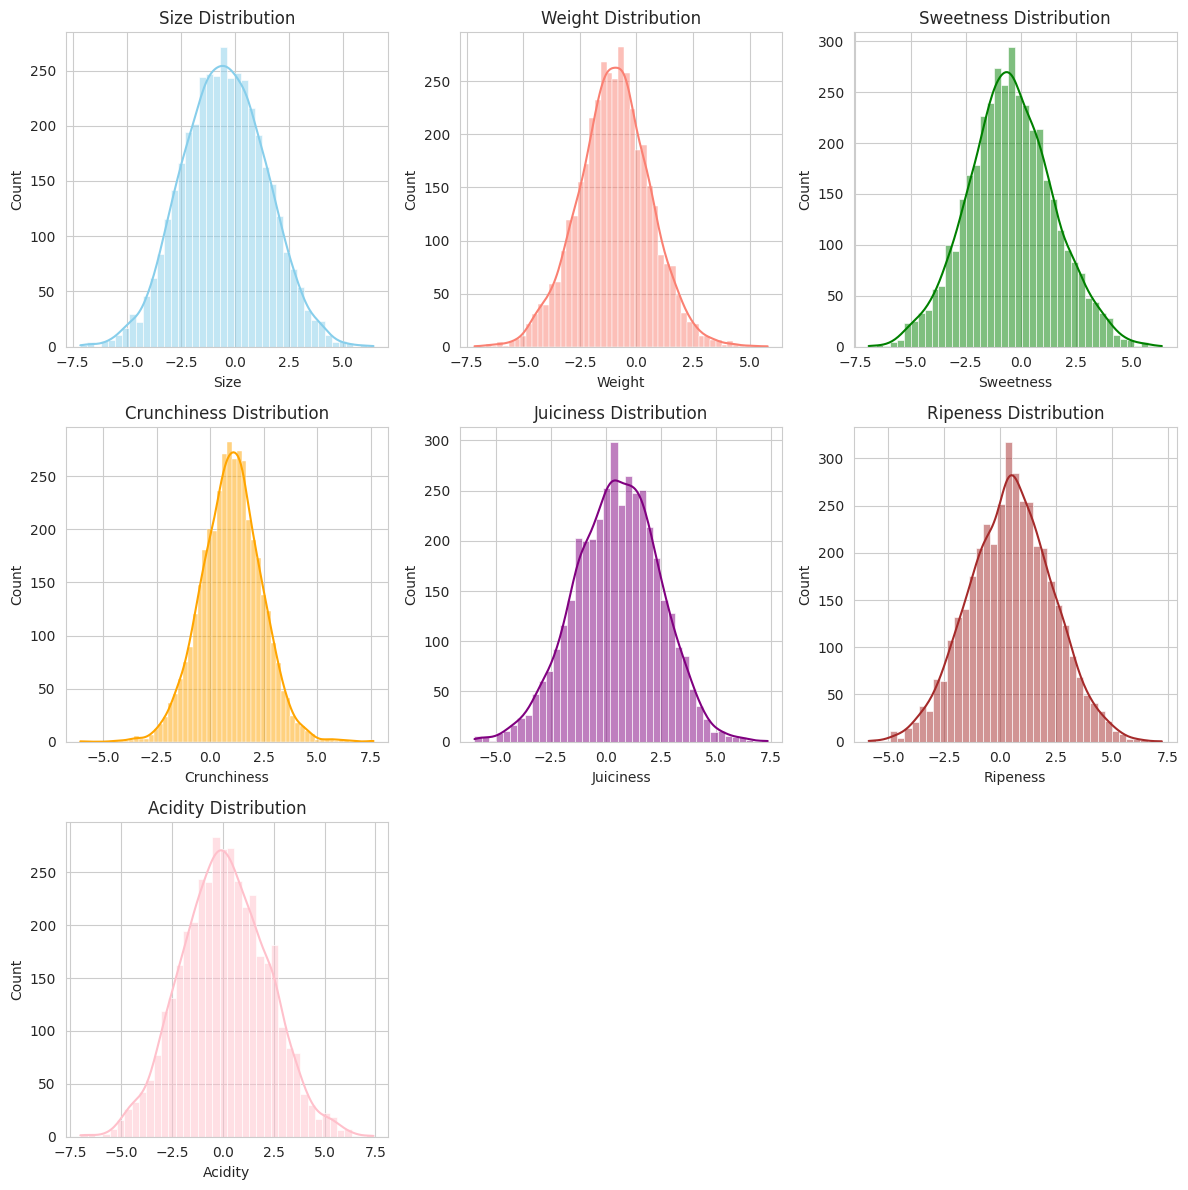

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.histplot(df['Size'], kde=True, color='skyblue')
plt.xlabel('Size')
plt.title('Size Distribution')

plt.subplot(3, 3, 2)
sns.histplot(df['Weight'], kde=True, color='salmon')
plt.xlabel('Weight')
plt.title('Weight Distribution')

plt.subplot(3, 3, 3)
sns.histplot(df['Sweetness'], kde=True, color='green')
plt.xlabel('Sweetness')
plt.title('Sweetness Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['Crunchiness'], kde=True, color='orange')
plt.xlabel('Crunchiness')
plt.title('Crunchiness Distribution')

plt.subplot(3, 3, 5)
sns.histplot(df['Juiciness'], kde=True, color='purple')
plt.xlabel('Juiciness')
plt.title('Juiciness Distribution')

plt.subplot(3, 3, 6)
sns.histplot(df['Ripeness'], kde=True, color='brown')
plt.xlabel('Ripeness')
plt.title('Ripeness Distribution')

plt.subplot(3, 3, 7)
sns.histplot(df['Acidity'], kde=True, color='pink')
plt.xlabel('Acidity')
plt.title('Acidity Distribution')

plt.tight_layout()
plt.show()


## Catch Outliers

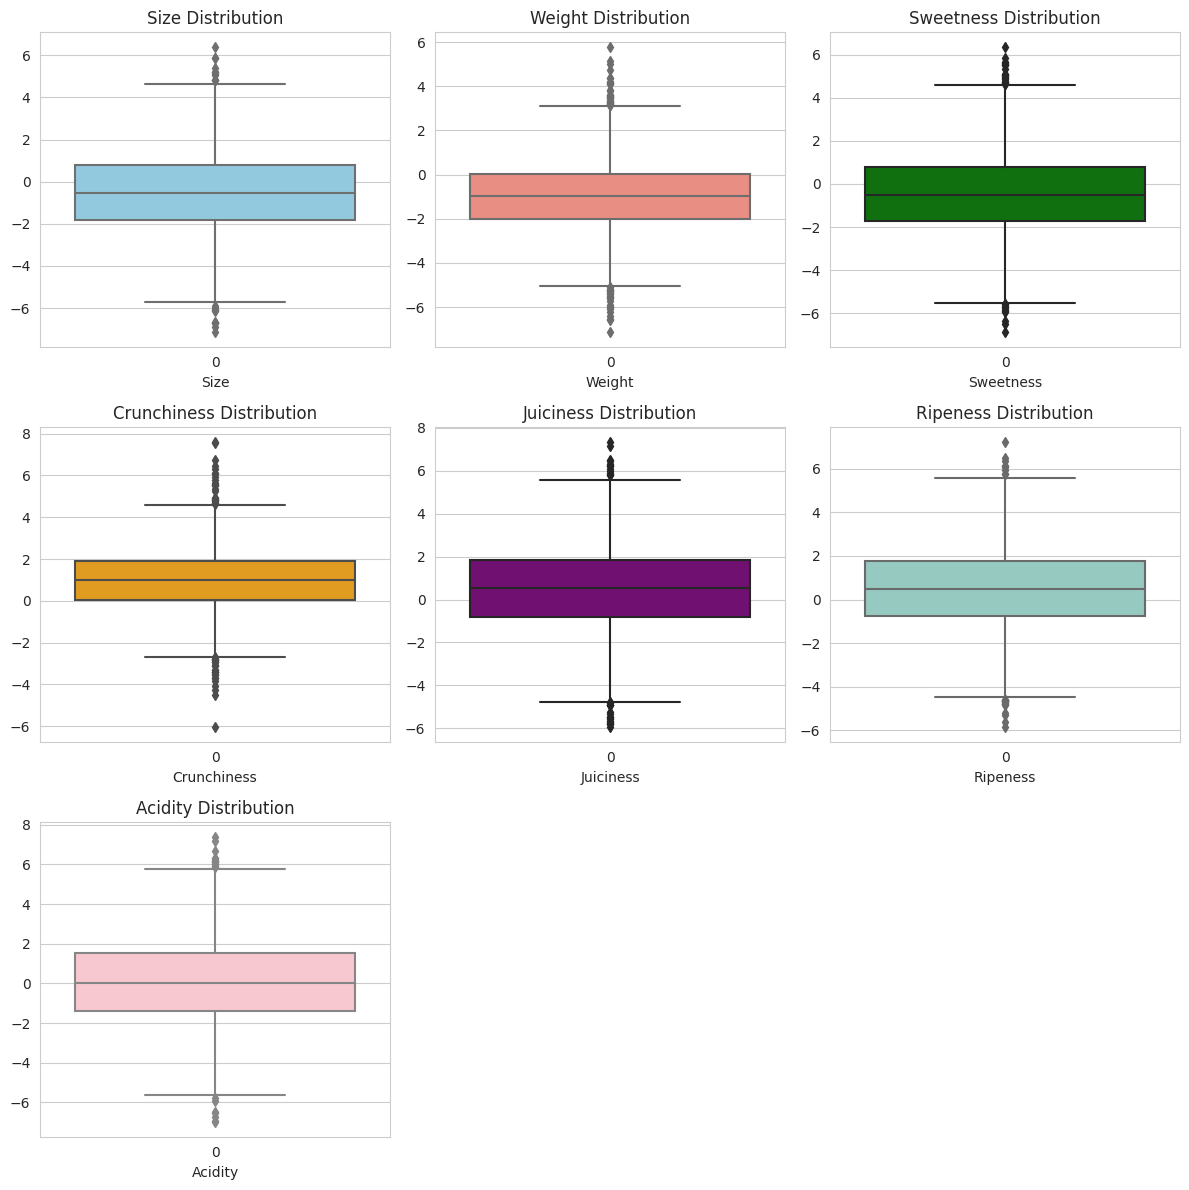

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.boxplot(df['Size'], color='skyblue')
plt.xlabel('Size')
plt.title('Size Distribution')

plt.subplot(3, 3, 2)
sns.boxplot(df['Weight'], color='salmon')
plt.xlabel('Weight')
plt.title('Weight Distribution')

plt.subplot(3, 3, 3)
sns.boxplot(df['Sweetness'], color='green')
plt.xlabel('Sweetness')
plt.title('Sweetness Distribution')

plt.subplot(3, 3, 4)
sns.boxplot(df['Crunchiness'],color='orange')
plt.xlabel('Crunchiness')
plt.title('Crunchiness Distribution')

plt.subplot(3, 3, 5)
sns.boxplot(df['Juiciness'], color='purple')
plt.xlabel('Juiciness')
plt.title('Juiciness Distribution')

plt.subplot(3, 3, 6)
sns.boxplot(df['Ripeness'],palette = "Set3")
plt.xlabel('Ripeness')
plt.title('Ripeness Distribution')

plt.subplot(3, 3, 7)
sns.boxplot(df['Acidity'],color='pink')
plt.xlabel('Acidity')
plt.title('Acidity Distribution')

plt.tight_layout()
plt.show()


## Quality Distribution

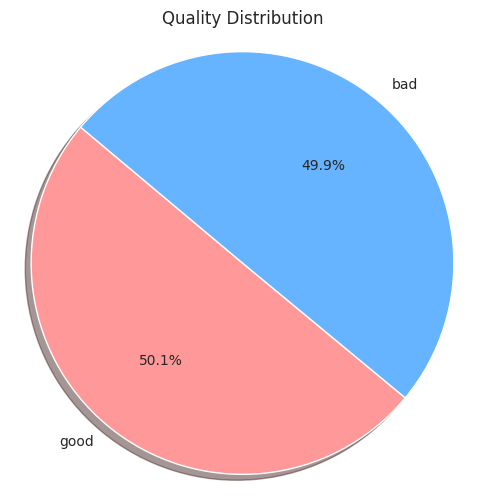

In [13]:
quality_counts = df['Quality'].value_counts()
labels = quality_counts.index
sizes = quality_counts.values


colors = ['#ff9999','#66b3ff']


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Quality Distribution')
plt.axis('equal')  

# Show plot
plt.show()


## Ripeness vs Crunchiness

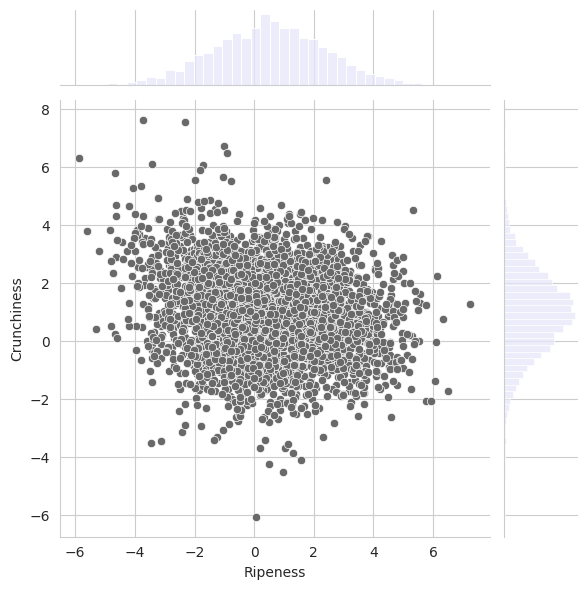

In [14]:
sns.jointplot(data = df,
              x = "Ripeness",
              y = "Crunchiness",
              color = "dimgray",
              marginal_kws = dict(color = "lavender"))
plt.show()

#### Encoding Target Values

In [15]:
df['Quality']=df['Quality'].replace({'good':1,'bad':0})

## Splitting features and target

In [16]:
X=df.drop('Quality',axis=1)
y=df['Quality']

## Split Train Test 

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Modeling

In [18]:
models=[('lr',LogisticRegression()),
       ('knn',KNeighborsClassifier()),
       ('rf',RandomForestClassifier()),
       ('gbm',GradientBoostingClassifier()),
       ('lgbm',LGBMClassifier(verbose=-1)),
       ('catBoost',CatBoostClassifier(iterations=1000, verbose=False)),
       ('tree',DecisionTreeClassifier()),
       ('xgboost',XGBClassifier())]

results=[]
names=[]

results = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=skfold, scoring='accuracy')
    results.append(name)
    msg = "%s : %f " % (name, cv_results.mean())
    print(msg)

lr : 0.745500 
knn : 0.893750 
rf : 0.883250 
gbm : 0.856500 
lgbm : 0.895250 
catBoost : 0.903000 
tree : 0.812000 
xgboost : 0.888500 


# Hyperparameters Tuning
CatBoost scored highest <br>
Now Let's tune the hyperparameters with optuna<br>
Found best parameters at 14'th iteration<br>
**If you want to tune further uncomment the cell and run**

In [19]:
# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
#         'max_bin': trial.suggest_int('max_bin', 1, 32),
#         'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 100.0),
#         'random_strength': trial.suggest_loguniform('random_strength', 1e-9, 10),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#     }

#     model = CatBoostClassifier(**params, random_state=42, verbose=False)

#     skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     cv_results = cross_val_score(model, X, y, cv=skfold, scoring='accuracy')

#     return cv_results.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# best_model = CatBoostClassifier(**best_params, random_state=42, verbose=False)
# best_model.fit(X, y)


## Best Parameter

In [20]:
best_params={'iterations': 951,
 'learning_rate': 0.012218817787516637,
 'depth': 10,
 'l2_leaf_reg': 1.9729940402742412,
 'max_bin': 28,
 'bagging_temperature': 46.53860160323191,
 'random_strength': 8.682066110551886e-06,
 'min_data_in_leaf': 34,
 'subsample': 0.5099466962425262,
 'colsample_bylevel': 0.46567958779094315}

# Training Best model

In [21]:
best_model = CatBoostClassifier(**best_params, random_state=42, verbose=False)
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ',accuracy)

Accuracy :  0.9125


# Classification Report

In [22]:
print(classification_report(y_test ,y_pred)) 


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       401
           1       0.91      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



## Export Model

In [24]:
import pickle
with open('apple_quality_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)